Thread: 1 Done!
Thread: 2 Done!
Thread: 3 Done!
Thread: 4 Done!
Thread: 5 Done!
Thread: 6 Done!
Thread: 7 Done!
Thread: 8 Done!
Thread: 9 Done!
Thread: 10 Done!
Thread: 11 Done!
Thread: 12 Done!
Thread: 13 Done!
Thread: 14 Done!
Thread: 15 Done!
Thread: 16 Done!
Thread: 17 Done!
Thread: 18 Done!
Thread: 19 Done!
Thread: 20 Done!
Thread: 21 Done!


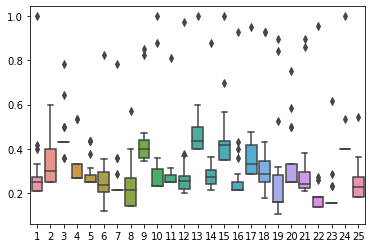

In [2]:
import speech
import os
import threading
import seaborn as sns
import pandas


#This function compares a text string, and an interpreted voice recording. Compares them and stores them
#Input: Speech Object, String(path to recordings), String(path to original text file), List of List(Storage)
#Output: -1 if error, 0 if sucess 
def conv_Compare_Push(speechObj,groupNumber,originalFile,storage):
    
    try:
        #Read orginal text file
        speechObj.read_original(originalFile)
        #Google converts audio to text
        speechObj.conv_audio(groupNumber)
        #Compare the strings
        speechObj.comp_string()
    except:
        return -1
    
    #Store the comparisions 
    storage.append(speechObj.distances)
    
    return 0

#Directory Variables
speechText = os.getcwd()  + '\\How Speech Recognition Works.txt'
currentDir = os.getcwd()

#Data storage and threads
data = [ ]
threads = []
print

#For each file in current directory
for file in os.listdir(currentDir):
    
    #if the folder is numberical
    if (file.isnumeric()):
        currentGroupDir = currentDir + '\\' + file
        speechObj = speech.Speech()
        
        #Make and start a thread for this folder 
        thread = threading.Thread(target=conv_Compare_Push,args=(speechObj,currentGroupDir,speechText,data,))
        threads.append(thread)
        thread.start()
        
count = 0        
#Join all threads    
for thread in threads:
    thread.join()
    print("Thread: "+str(count + 1)+" Done!")
    count = count + 1


cleanedData = pandas.DataFrame(data = data,columns=[i+1 for i in range(25)])
ax = sns.boxplot(data=cleanedData)